In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_le_wagon_project_data.csv')

In [3]:
df.head(5)

,sr_no,gender,category,grade_10,grade_12,graduation_score,graduation_type,admission_test_score,work_exp_months,shortlist_uni_1,...,shortlist_uni_2,admit_uni_2,shortlist_uni_3,admit_uni_3,shortlist_uni_4,admit_uni_4,shortlist_uni_5,admit_uni_5,shortlist_uni_6,admit_uni_6
0,1,Male,General,82.0,86.5,77.4,Engineer,92.43,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Female,General,95.0,95.6,85.4,Engineer,94.29,16,0,...,0,0,0,0,0,0,1,0,0,0
2,3,Female,General,93.1,91.6,79.2,Non-Engineer,92.52,4,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Male,General,91.8,89.7,80.7,Non-Engineer,96.57,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Female,General,96.0,86.2,92.4,Non-Engineer,91.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = df.drop(['sr_no', 'admit_uni_1', 'admit_uni_2', 'admit_uni_3', 'admit_uni_4', 'admit_uni_5', 'admit_uni_6'], axis=1)
df = df.dropna().copy()

In [5]:
df = pd.get_dummies(df, columns=['category'], drop_first=True)
df.head(10)

,gender,grade_10,grade_12,graduation_score,graduation_type,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
0,Male,82.0,86.5,77.4,Engineer,92.43,30,0,0,0,0,0,0,1,0,0,0
1,Female,95.0,95.6,85.4,Engineer,94.29,16,0,0,0,0,1,0,1,0,0,0
2,Female,93.1,91.6,79.2,Non-Engineer,92.52,4,0,0,0,0,0,0,1,0,0,0
3,Male,91.8,89.7,80.7,Non-Engineer,96.57,0,0,0,0,0,0,0,1,0,0,0
4,Female,96.0,86.2,92.4,Non-Engineer,91.00,0,0,0,0,0,0,0,1,0,0,0
5,Male,87.4,92.6,79.9,Engineer,99.63,21,0,0,1,0,0,0,1,0,0,0
6,Male,99.3,89.7,73.6,Engineer,95.01,25,0,1,0,1,1,1,0,1,0,0
7,Male,95.0,86.8,71.1,Engineer,99.26,26,0,0,0,0,0,0,1,0,0,0
8,Male,87.4,79.6,70.1,Engineer,99.22,28,0,0,0,0,0,1,1,0,0,0
9,Female,85.5,84.3,70.9,Non-Engineer,91.50,14,0,0,0,0,1,0,0,1,0,0


In [6]:
df.describe()

,grade_10,grade_12,graduation_score,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,90.377995,87.041371,77.094213,92.270982,9.507360,0.096701,0.148985,0.104315,0.203299,0.272843,0.220305,0.700508,0.178426,0.061421,0.012437
std,6.264717,8.473028,8.907866,8.770741,12.302843,0.295587,0.356119,0.305707,0.402505,0.445477,0.414505,0.458094,0.382920,0.240132,0.110838
min,52.300000,52.600000,50.000000,27.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.400000,82.600000,71.200000,90.057500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,92.400000,89.200000,77.500000,95.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,95.000000,93.400000,83.400000,98.090000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Class_weight balance for class imbalance

In [8]:
df.replace(to_replace = "Male", value = "0", inplace = True)
df.replace(to_replace = "Female", value = "1", inplace = True)
df.replace(to_replace = "Engineer", value = "0", inplace = True)
df.replace(to_replace = "Non-Engineer", value = "1", inplace = True)
df.rename(columns={"gender": "is_female", "graduation_type": "is_non-engineer"}, inplace=True)
df.head(5)

,is_female,grade_10,grade_12,graduation_score,is_non-engineer,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
0,0,82.0,86.5,77.4,0,92.43,30,0,0,0,0,0,0,1,0,0,0
1,1,95.0,95.6,85.4,0,94.29,16,0,0,0,0,1,0,1,0,0,0
2,1,93.1,91.6,79.2,1,92.52,4,0,0,0,0,0,0,1,0,0,0
3,0,91.8,89.7,80.7,1,96.57,0,0,0,0,0,0,0,1,0,0,0
4,1,96.0,86.2,92.4,1,91.00,0,0,0,0,0,0,0,1,0,0,0


In [9]:
X = df[["is_female", "grade_10", "grade_12", "graduation_score", "is_non-engineer", "admission_test_score", 
            "work_exp_months", "category_General", "category_NC_OBC", "category_SC", "category_ST"]]
y1 = df["shortlist_uni_1"]
y2 = df["shortlist_uni_2"]
y3 = df["shortlist_uni_3"]
y4 = df["shortlist_uni_4"]
y5 = df["shortlist_uni_5"]
y6 = df["shortlist_uni_6"]

In [10]:
scaler = RobustScaler()
df["grade_10"] = scaler.fit_transform(df[["grade_10"]])
df["grade_12"] = scaler.fit_transform(df[["grade_12"]])
df["graduation_score"] = scaler.fit_transform(df[["graduation_score"]])
df["admission_test_score"] = scaler.fit_transform(df[["admission_test_score"]])
df["work_exp_months"] = scaler.fit_transform(df[["work_exp_months"]])

In [11]:
df.head()

,is_female,grade_10,grade_12,graduation_score,is_non-engineer,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
0,0,-1.368421,-0.250000,-0.008197,0,-0.321195,1.666667,0,0,0,0,0,0,1,0,0,0
1,1,0.342105,0.592593,0.647541,0,-0.089636,0.888889,0,0,0,0,1,0,1,0,0,0
2,1,0.092105,0.222222,0.139344,1,-0.309991,0.222222,0,0,0,0,0,0,1,0,0,0
3,0,-0.078947,0.046296,0.262295,1,0.194211,0.000000,0,0,0,0,0,0,1,0,0,0
4,1,0.473684,-0.277778,1.221311,1,-0.499222,0.000000,0,0,0,0,0,0,1,0,0,0


In [31]:
df.describe()

,grade_10,grade_12,graduation_score,admission_test_score,work_exp_months,shortlist_uni_1,shortlist_uni_2,shortlist_uni_3,shortlist_uni_4,shortlist_uni_5,shortlist_uni_6,category_General,category_NC_OBC,category_SC,category_ST
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,-0.266053,-0.199873,-0.033261,-0.340992,0.528187,0.096701,0.148985,0.104315,0.203299,0.272843,0.220305,0.700508,0.178426,0.061421,0.012437
std,0.824305,0.784540,0.730153,1.091907,0.683491,0.295587,0.356119,0.305707,0.402505,0.445477,0.414505,0.458094,0.382920,0.240132,0.110838
min,-5.276316,-3.388889,-2.254098,-8.343604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.657895,-0.611111,-0.516393,-0.616558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.342105,0.388889,0.483607,0.383442,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.844262,0.621226,4.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Model 1
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model1 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model1.fit(X_train, y_train)

# Make predictions on the testing data
predictions1 = model1.predict(X_test)

# Evaluate the model's accuracy
accuracy1 = (predictions1 == y_test).mean()
print(f"Uni 1 Model accuracy: {accuracy1:.2f}")

Uni 1 Model accuracy: 0.70


In [33]:
#Model 2
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model2 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model2.fit(X_train, y_train)

# Make predictions on the testing data
predictions2 = model2.predict(X_test)

# Evaluate the model's accuracy
accuracy2 = (predictions2 == y_test).mean()
print(f"Uni 2 Model accuracy: {accuracy2:.2f}")

Uni 2 Model accuracy: 0.76


In [35]:
#Model 3
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model3 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model3.fit(X_train, y_train)

# Make predictions on the testing data
predictions3 = model3.predict(X_test)

# Evaluate the model's accuracy
accuracy3 = (predictions3 == y_test).mean()
print(f"Uni 3 Model accuracy: {accuracy3:.2f}")

Uni 3 Model accuracy: 0.80


In [37]:
#Model 4
X_train, X_test, y_train, y_test = train_test_split(X, y4, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model4 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model4.fit(X_train, y_train)

# Make predictions on the testing data
predictions4 = model4.predict(X_test)

# Evaluate the model's accuracy
accuracy4 = (predictions4 == y_test).mean()
print(f"Uni 4 Model accuracy: {accuracy4:.2f}")

Uni 4 Model accuracy: 0.72


In [39]:
#Model 5
X_train, X_test, y_train, y_test = train_test_split(X, y5, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model5 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model5.fit(X_train, y_train)

# Make predictions on the testing data
predictions5 = model5.predict(X_test)

# Evaluate the model's accuracy
accuracy5 = (predictions5 == y_test).mean()
print(f"Uni 5 Model accuracy: {accuracy5:.2f}")

Uni 5 Model accuracy: 0.76


In [41]:
#Model 6
X_train, X_test, y_train, y_test = train_test_split(X, y6, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model6 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model6.fit(X_train, y_train)

# Make predictions on the testing data
predictions6 = model6.predict(X_test)

# Evaluate the model's accuracy
accuracy6 = (predictions6 == y_test).mean()
print(f"Uni 6 Model accuracy: {accuracy6:.2f}")

Uni 6 Model accuracy: 0.75


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [54]:
print('Accuracy =', round(accuracy_score(y_test, predictions6), 2)) # Accuracy
print('Precision =', round(precision_score(y_test, predictions6), 2)) # Precision
print('Recall =', round(recall_score(y_test, predictions6), 2)) # Recall
print('F1 score =', round(f1_score(y_test, predictions6), 2)) # F1 score

Accuracy = 0.75
Precision = 0.47
Recall = 0.85
F1 score = 0.6


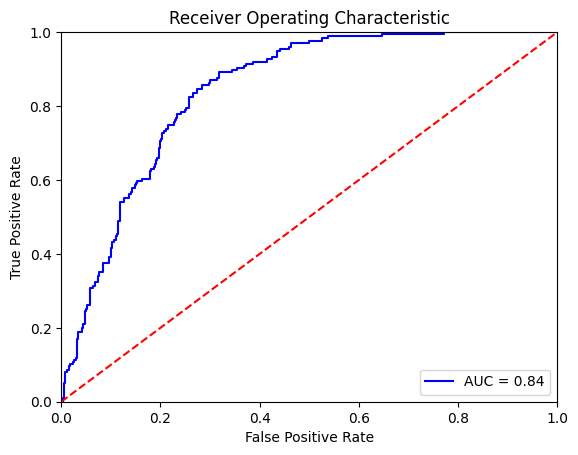

In [60]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model6.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
print(f"Uni 1 Model accuracy: {accuracy1:.2f}")
print(f"Uni 2 Model accuracy: {accuracy2:.2f}")
print(f"Uni 3 Model accuracy: {accuracy3:.2f}")
print(f"Uni 4 Model accuracy: {accuracy4:.2f}")
print(f"Uni 5 Model accuracy: {accuracy5:.2f}")
print(f"Uni 6 Model accuracy: {accuracy6:.2f}")

Uni 1 Model accuracy: 0.70
Uni 2 Model accuracy: 0.76
Uni 3 Model accuracy: 0.80
Uni 4 Model accuracy: 0.72
Uni 5 Model accuracy: 0.76
Uni 6 Model accuracy: 0.75


In [62]:
# Using the Le Wagon Exercise Code for University 1
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model1 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results1 = cross_validate(model1, X, y1, cv=5)

# Mean of accuracies
accuracy1 = cv_results1['test_score'].mean()
accuracy1

0.6967005076142131

In [21]:
# Using the Le Wagon Exercise Code for University 2
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model2 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results2 = cross_validate(model2, X, y2, cv=5)

# Mean of accuracies
accuracy2 = cv_results2['test_score'].mean()
accuracy2

0.7573604060913706

In [22]:
# Using the Le Wagon Exercise Code for University 3
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model3 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results3 = cross_validate(model3, X, y3, cv=5)

# Mean of accuracies
accuracy3 = cv_results3['test_score'].mean()
accuracy3

0.7923857868020304

In [23]:
# Using the Le Wagon Exercise Code for University 4
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model4 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results4 = cross_validate(model4, X, y4, cv=5)

# Mean of accuracies
accuracy4 = cv_results4['test_score'].mean()
accuracy4

0.7279187817258883

In [24]:
# Using the Le Wagon Exercise Code for University 5
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model5 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results5 = cross_validate(model5, X, y5, cv=5)

# Mean of accuracies
accuracy5 = cv_results5['test_score'].mean()
accuracy5

0.7634517766497463

In [25]:
# Using the Le Wagon Exercise Code for University 6
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Instantiate model
model6 = LogisticRegression(max_iter=10000, class_weight='balanced')

# 5-Fold Cross validate model
cv_results6 = cross_validate(model6, X, y6, cv=5)

# Mean of accuracies
accuracy6 = cv_results6['test_score'].mean()
accuracy6

0.7380710659898477

Uni 6 Model accuracy: 0.75


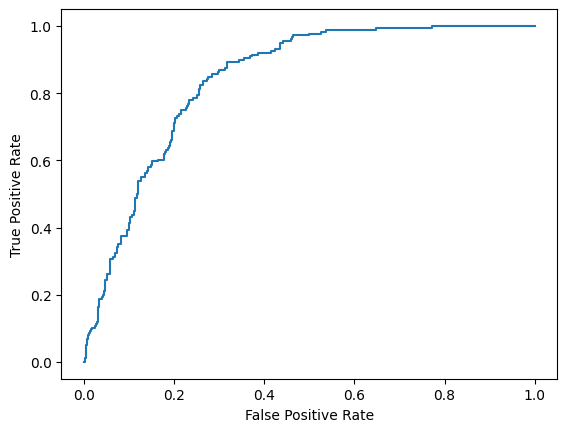

In [26]:
# Fit a logistic regression model to the training data
model6 = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
model6.fit(X_train, y_train)

# Make predictions on the testing data
predictions6 = model6.predict(X_test)

# Evaluate the model's accuracy
accuracy6 = (predictions6 == y_test).mean()
print(f"Uni 6 Model accuracy: {accuracy6:.2f}")

# Make predictions on the testing data
predictions6 = model6.predict(X_test)

#define metrics
y_pred_proba = model6.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()